In [2]:
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
%matplotlib inline

In [7]:
HYDRO1 = glob.glob(r'../03. results/**/*hydinfo1.txt', recursive=True)
HYDRO2 = glob.glob(r'../03. results/**/*hydinfo2.txt', recursive=True)
HYDRO3 = glob.glob(r'../03. results/**/*hydinfo3.txt', recursive=True)
HYDRO4 = glob.glob(r'../03. results/**/*hydinfo4.txt', recursive=True)


print(len(HYDRO1))

for i in HYDRO1:
    print(i)

11
../03. results\11_results\11_files\11_hydinfo1.txt
../03. results\12_results\12_files\12_hydinfo1.txt
../03. results\13_results\13_files\13_hydinfo1.txt
../03. results\14_results\14_files\14_hydinfo1.txt
../03. results\21_results\21_files\21_hydinfo1.txt
../03. results\22_results\22_files\22_hydinfo1.txt
../03. results\23_results\23_files\23_hydinfo1.txt
../03. results\31_results\31_files\31_hydinfo1.txt
../03. results\32_results\32_files\32_hydinfo1.txt
../03. results\33_results\33_files\33_hydinfo1.txt
../03. results\41_results\41_files\41_hydinfo1.txt


# Overall hydrographs for all LS

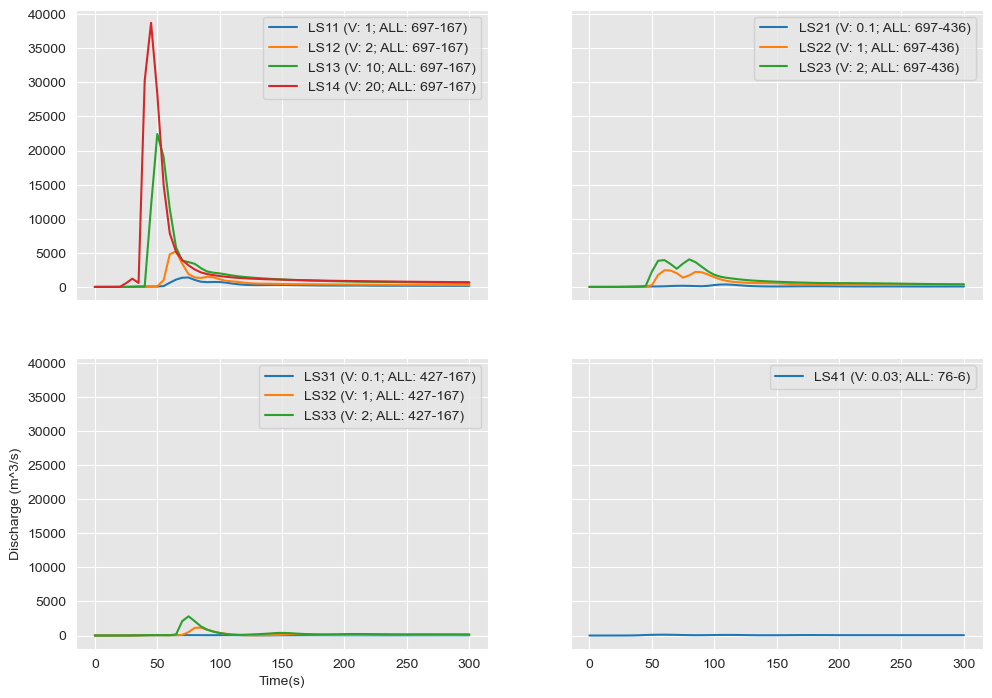

In [29]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(11.7, 8.3)) # 
colors = sns.color_palette('pastel')
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) # darkgrid, white grid, dark, white and ticks
# plt.rc('axes', titlesize=18)     # fontsize of the axes title
# plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
# plt.rc('legend', fontsize=13)    # legend fontsize
# plt.rc('font', size=13)          # controls default text sizes

for i, hydro in enumerate(HYDRO1):

    
    df = pd.read_csv(hydro, sep='\t')
    df['Q3'] = df['Q3'].abs()
    df['Q1'] = df['Q1'].abs()
    
    
    if i==0:
        ax[0,0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS11 (V: 1; ALL: 697-167)")
    
    if i==1:
        ax[0,0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS12 (V: 2; ALL: 697-167)")
        
    if i==2:
        ax[0,0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS13 (V: 10; ALL: 697-167)")
        
    if i==3:
        ax[0,0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS14 (V: 20; ALL: 697-167)")
    
    if i==4:
        ax[0,1].plot(df['T'], df['Q1'] + df['Q3'], label ="LS21 (V: 0.1; ALL: 697-436)")
    
    if i==5:
        ax[0,1].plot(df['T'], df['Q1'] + df['Q3'], label ="LS22 (V: 1; ALL: 697-436)")
        
    if i==6:
        ax[0,1].plot(df['T'], df['Q1'] + df['Q3'], label ="LS23 (V: 2; ALL: 697-436)")
        
    if i==7:
        ax[1,0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS31 (V: 0.1; ALL: 427-167)")
        
        
    if i==8:
        ax[1,0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS32 (V: 1; ALL: 427-167)")
        
    if i==9:
        ax[1,0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS33 (V: 2; ALL: 427-167)")
        
    if i==10:
        ax[1,1].plot(df['T'], df['Q1'] + df['Q3'], label ="LS41 (V: 0.03; ALL: 76-6)")
    

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

ax[1,0].set_xlabel("Time(s)")
ax[1,0].set_ylabel('Discharge (m^3/s)')

# fig.supylabel('Discharge (m^3/s)', )
# fig.supxlabel("Time (s)")

plt.savefig(r'../05. figures/graphs/hydro2_overall.png', dpi=500)

# ax[0,0].set_title('1000 m Downstream Hydrograph for LS1')
# ax[0,1].set_title('1000 m Downstream Hydrograph for LS2')
# ax[1,0].set_title('1000 m Downstream Hydrograph for LS3')
# ax[1,1].set_title('1000 m Downstream Hydrograph for LS4')

# Based on landslide fall distance

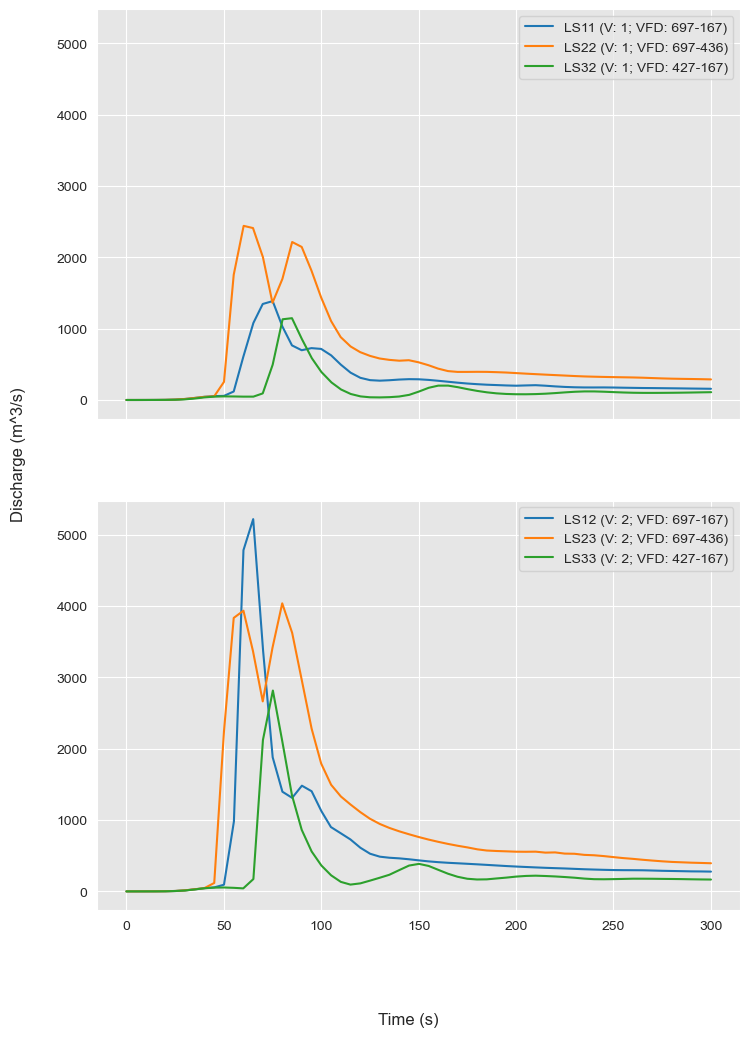

In [10]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(8.3,11.7))
for i, hydro in enumerate(HYDRO1):
    df = pd.read_csv(hydro, sep='\t')
    df['Q3'] = df['Q3'].abs()
    df['Q1'] = df['Q1'].abs()
    
    if i==0:
        ax[0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS11 (V: 1; ALL: 697-167)")
    
    if i==1:
        ax[1].plot(df['T'], df['Q1'] + df['Q3'], label ="LS12 (V: 2; ALL: 697-167)")
    
    if i==5:
        ax[0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS22 (V: 1; ALL: 697-436)")
        
    if i==6:
        ax[1].plot(df['T'], df['Q1'] + df['Q3'], label ="LS23 (V: 2; ALL: 697-436)")
        
        
    if i==8:
        ax[0].plot(df['T'], df['Q1'] + df['Q3'], label ="LS32 (V: 1; ALL: 427-167)")
        
    if i==9:
        ax[1].plot(df['T'], df['Q1'] + df['Q3'], label ="LS33 (V: 2; ALL: 427-167)")
        
    

ax[0].legend()
ax[1].legend()

fig.supylabel('Discharge (m^3/s)')
fig.supxlabel("Time (s)")

plt.savefig(r'../05. figures/graphs/hydro2_VFD.png', dpi=500)


# ax[0].set_title('Hydrograph for LS1')
# ax[1].set_title('Hydrograph for LS2')
# ax[2].set_title('Hydrograph for LS3')

# Discharge on different stations

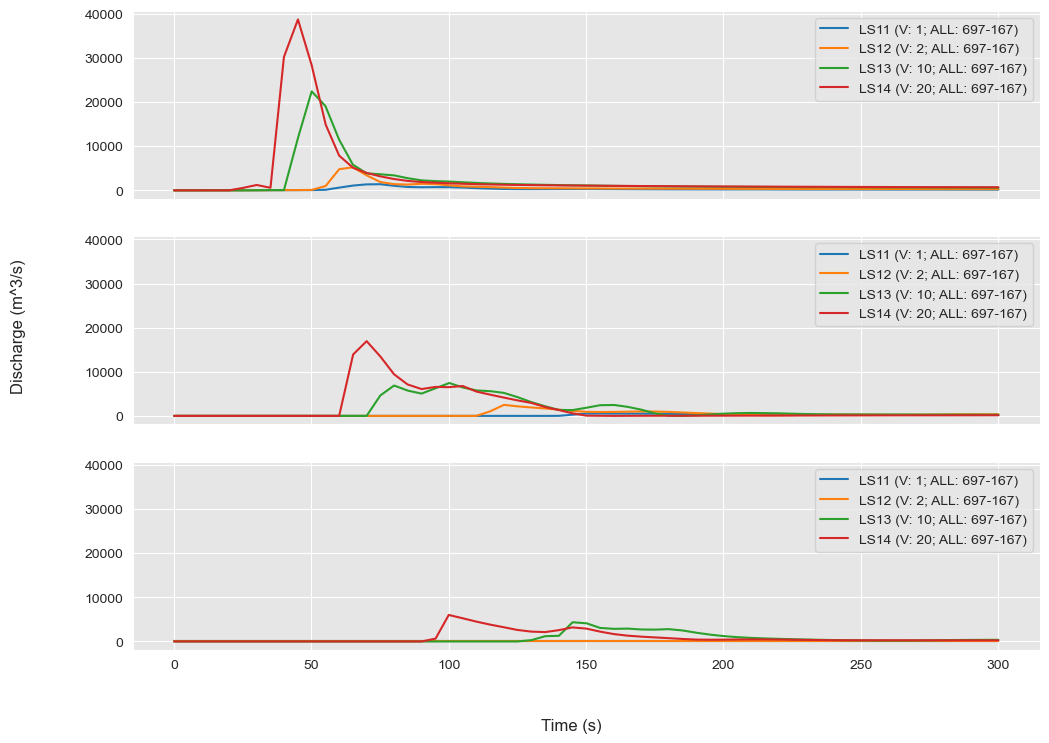

In [17]:
fig, ax = plt.subplots(3,1, sharex=True, sharey=True, figsize=(11.7, 8.3)) # 
colors = sns.color_palette('pastel')
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) # darkgrid, white grid, dark, white and ticks


for i, (hydro1, hydro2, hydro3) in enumerate(zip(HYDRO1, HYDRO2, HYDRO3)):

    
    df1 = pd.read_csv(hydro1, sep='\t')
    df1['Q3'] = df1['Q3'].abs()
    df1['Q1'] = df1['Q1'].abs()
    
    df2 = pd.read_csv(hydro2, sep='\t')
    df2['Q3'] = df2['Q3'].abs()
    df2['Q1'] = df2['Q1'].abs()
    
    df3 = pd.read_csv(hydro3, sep='\t')
    df3['Q3'] = df3['Q3'].abs()
    df3['Q1'] = df3['Q1'].abs()
    
    if i==0:
        ax[0].plot(df1['T'], df1['Q1'] + df1['Q3'], label ="LS11 (V: 1; ALL: 697-167)")
        ax[1].plot(df2['T'], df2['Q1'] + df2['Q3'], label ="LS11 (V: 1; ALL: 697-167)")
        ax[2].plot(df3['T'], df3['Q1'] + df3['Q3'], label ="LS11 (V: 1; ALL: 697-167)")
    
    if i==1:
        ax[0].plot(df1['T'], df1['Q1'] + df1['Q3'], label ="LS12 (V: 2; ALL: 697-167)")
        ax[1].plot(df2['T'], df2['Q1'] + df2['Q3'], label ="LS12 (V: 2; ALL: 697-167)")
        ax[2].plot(df3['T'], df3['Q1'] + df3['Q3'], label ="LS12 (V: 2; ALL: 697-167)")
        
    if i==2:
        ax[0].plot(df1['T'], df1['Q1'] + df1['Q3'], label ="LS13 (V: 10; ALL: 697-167)")
        ax[1].plot(df2['T'], df2['Q1'] + df2['Q3'], label ="LS13 (V: 10; ALL: 697-167)")
        ax[2].plot(df3['T'], df3['Q1'] + df3['Q3'], label ="LS13 (V: 10; ALL: 697-167)")
        
    if i==3:
        ax[0].plot(df1['T'], df1['Q1'] + df1['Q3'], label ="LS14 (V: 20; ALL: 697-167)")
        ax[1].plot(df2['T'], df2['Q1'] + df2['Q3'], label ="LS14 (V: 20; ALL: 697-167)")
        ax[2].plot(df3['T'], df3['Q1'] + df3['Q3'], label ="LS14 (V: 20; ALL: 697-167)")
    

ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.supylabel('Discharge (m^3/s)')
fig.supxlabel("Time (s)")

plt.savefig(r'../05. figures/graphs/ls1_hydrographs_for_O1_O2_O3.png', dpi=500)

# ax[0,0].set_title('1000 m Downstream Hydrograph for LS1')
# ax[0,1].set_title('1000 m Downstream Hydrograph for LS2')
# ax[1,0].set_title('1000 m Downstream Hydrograph for LS3')
# ax[1,1].set_title('1000 m Downstream Hydrograph for LS4')

In [4]:
from sklearn.metrics import auc

df = pd.read_csv(r"C:\Users\tek.kshetri\OneDrive - University of Calgary\GLGY 701\99. sample outputs\14ll_results\14ll_files\14ll_hydinfo1.txt", sep='\t')
df.head()


,T,H1,V1,E1,Q1,H2,V2,E2,Q2,H3,V3,E3,Q3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00
1,5.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.04
2,10.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.08,0.0,0.26
3,15.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.38,0.0,0.72
4,20.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.84,0.0,2.63


[   0.     5.1   10.1   15.1   20.1   25.1   30.1   35.1   40.    45.1
   50.1   55.2   60.1   65.2   70.1   75.1   80.1   85.    90.1   95.2
  100.   105.1  110.1  115.1  120.2  125.   130.1  135.1  140.1  145.
  150.1  155.2  160.1  165.1  170.2  175.   180.   185.1  190.1  195.1
  200.   205.1  210.   215.1  220.1  225.   230.1  235.1  240.2  245.
  250.1  255.1  260.   265.1  270.1  275.1  280.   285.   290.   295.1
  300.1  305.1  310.2  315.1  320.1  325.1  330.1  335.1  340.   345.1
  350.1  355.   360.1  365.1  370.1  375.2  380.2  385.1  390.1  395.1
  400.1  405.1  410.   415.1  420.1  425.1  430.2  435.2  440.1  445.
  450.1  455.   460.1  465.   470.1  475.   480.1  485.   490.2  495.1
  500.   505.   510.2  515.1  520.   525.1  530.1  535.   540.1  545.2
  550.1  555.2  560.1  565.1  570.1  575.1  580.2  585.2  590.2  595.1
  600.   605.2  610.2  615.1  620.1  625.1  630.   635.2  640.1  645.1
  650.   655.1  660.   665.1  670.2  675.   680.1  685.1  690.2  695.
  700.1  7

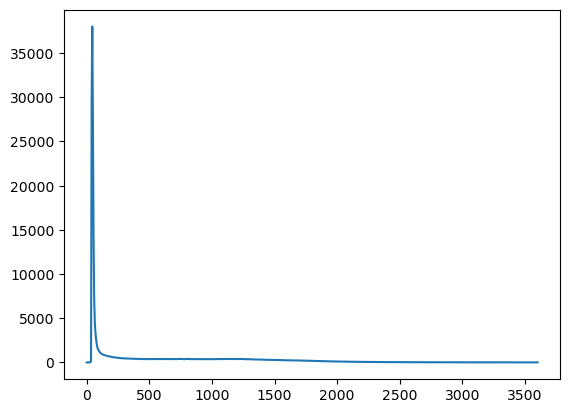

In [5]:
xx = df['T'].to_numpy()
yy = df['Q3'].abs().to_numpy()
print(xx, yy)
plt.plot(xx,yy)

In [16]:
import numpy as np
def integrate(x, y):
    area = np.trapz(y=y, x=x)
    return area
print(integrate(xx, yy))

1422350.8765


In [6]:
auc(xx,yy)

1422350.8765

In [18]:
plt.

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_font_names'